# Import Libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load two grayscale images

In [3]:
img1 = cv2.imread('Differences.png', cv2.IMREAD_GRAYSCALE)         #TO DO
img2 = cv2.imread('Differences2.png', cv2.IMREAD_GRAYSCALE)         #TO DO

In [4]:
# Make sure both images have the same size
if img1.shape != img2.shape:
        img2 = cv2.resize(img2, img1.shape)

# Method 1

In [25]:
# Create an RGB image where:
# - Red channel is img1
# - Green channel is img2
# - Blue channel is zeros
blue_channel = np.zeros(img1.shape)             #TO DO


In [40]:
# Stack the channels
color_diff = np.stack((blue_channel, img2, img1), axis = -1)  # (B, G, R)         #TO DO
color_diff = color_diff.astype('uint8')

In [41]:
# Convert to RGB for displaying with matplotlib (OpenCV uses BGR)
color_diff_rgb = cv2.cvtColor(color_diff, cv2.COLOR_BGR2RGB)       #TO DO

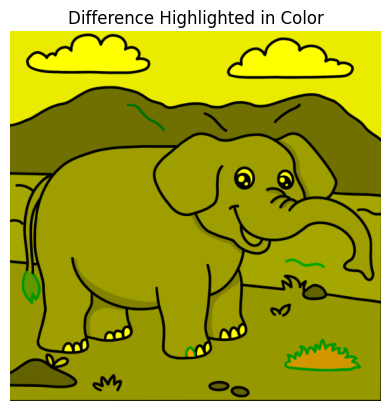

In [43]:
# Show the result
plt.imshow(color_diff_rgb)
plt.title('Difference Highlighted in Color')
plt.axis('off')
plt.show()

# Method 2

In [44]:
# Create an empty RGB image
color_diff = np.zeros((img1.shape[0], img1.shape[1], 3)) #TO DO

In [47]:
# Where images are equal → keep grayscale
mask_equal = img1 == img2
grayscale = img1[mask_equal]
color_diff[mask_equal] = np.stack([grayscale] * 3, axis = -1)        #TO DO

In [ ]:
# Where img1 > img2 → red
mask_red = img1 > img2
color_diff[mask_red] = [255, 0, 0]       #TO DO

# Where img2 > img1 → blue
mask_blue = img2 > img1
color_diff[mask_blue] = [0, 0, 255]        #TO DO

color_diff = color_diff.astype('uint8')

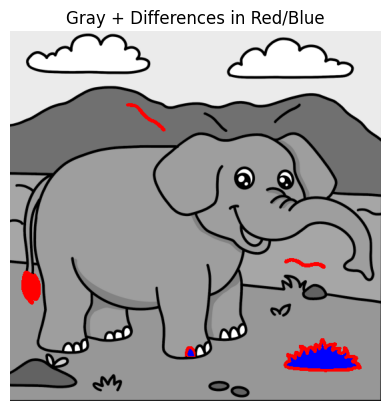

In [55]:
# Show result
plt.imshow(cv2.cvtColor(color_diff, cv2.COLOR_BGR2RGB))
plt.title("Gray + Differences in Red/Blue")
plt.axis('off')
plt.show()